# <font color="blue"> Good Morning</font>


<font size="4">Today, I will be presenting the different Machine learning techniques used to predict IOWA house prices. This dataset has 
always been my favorite because of multivariability, missing values and inconsistency.</font>

# 1. Exploratory Data Analysis

In [1]:
#Importing the modules
from IPython.display import HTML, display
import os
import pandas as pd
import numpy as np
import seaborn as se
import matplotlib.pyplot as plt
os.chdir('C:\\Users\\samarth\\Desktop\\Rstudio\\IOWA')

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [3]:
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

In [4]:
# Importing the dataset
# train_data
house_data= pd.read_csv('train.csv', index_col=0)

In [3]:
print('House dataset has {0} records and {1} attributes'.format(house_data.shape[0], house_data.shape[1]))

House dataset has 1460 records and 80 attributes


Top 5 rows of train dataset

In [56]:
a=house_data.groupby('OverallQual').SalePrice.mean().round(2)



OverallQual
1      50150.00
2      51770.33
3      87473.75
4     108420.66
5     133523.35
6     161603.03
7     207716.42
8     274735.54
9     367513.02
10    438588.39
Name: SalePrice, dtype: float64

In [6]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Target variable- SalePrice, other 79 variables are features to use to predict SalePrice.

List of all the Numerical variables.

In [7]:
house_data.select_dtypes(exclude=['object']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
print('There are {} numerical variables present including the target, SalePrice.'.format(len(house_data.select_dtypes(exclude=['object']).columns)))

There are 37 numerical variables present including the target, SalePrice.


* Some potential anomalies in certain rows of the dataset may cause the column data type to become an 'object'. This may lead to an error in distinguishing between numerical and categorical columns. How can this be checked efficiently?
* It is possible that there are numerical columns that have data in the form of discrete, and limited number of values. Such columns may also be interpreted as categorical data.

The 37 numerical columns have the following general characteristics:

In [9]:
house_data.select_dtypes(exclude=['object']).describe().round(decimals=2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


List of all Categorical variables in dataset.

In [10]:
house_data.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
print('There are {} Categorical variables present.'.format(len(house_data.select_dtypes(include=['object']).columns)))

There are 43 Categorical variables present.


In [12]:
house_data.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


<font size="4">Exploring Numerical variables</font>

Checking the Skewness (distribution ) of target variable. It's always a good practice to check the distribution of variables.

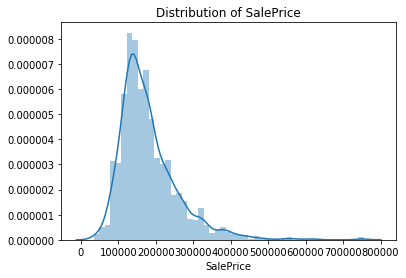

In [13]:
target = house_data.SalePrice
plt.figure()
se.distplot(target)
plt.title('Distribution of SalePrice')
plt.show()

In [44]:
house_data.SalePrice.mean()

180921.19589041095

It is visible that Sale Prices are highly positive skewed. Transforming the variable using log.

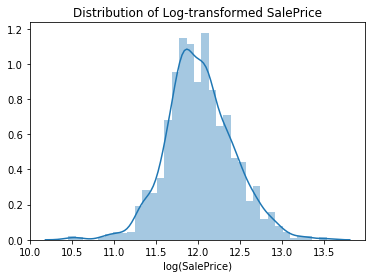

In [14]:
se.distplot(np.log(target))
plt.title('Distribution of Log-transformed SalePrice')
plt.xlabel('log(SalePrice)')
plt.show()

In [15]:
print('SalePrice has a skew of ' + str(target.skew().round(decimals=2)) + 
      ' while the log-transformed SalePrice improves the skew to ' + 
      str(np.log(target).skew().round(decimals=2)))

SalePrice has a skew of 1.88 while the log-transformed SalePrice improves the skew to 0.12


<font size="4">Distribution of variables</font>

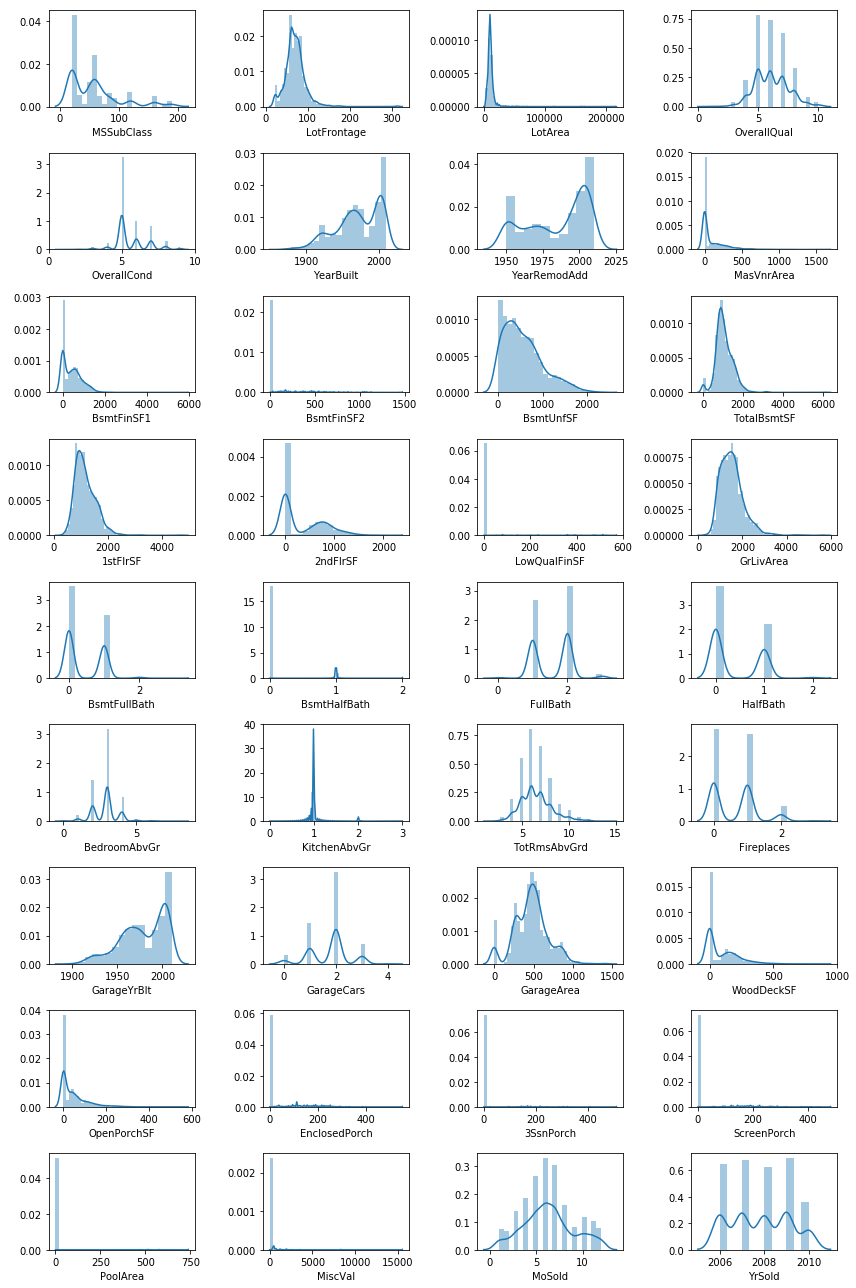

In [16]:
num_attributes = house_data.select_dtypes(exclude='object').drop('SalePrice', axis=1).copy()

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    se.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])
    
plt.tight_layout()
plt.show()

Notes for Data Cleaning & Preprocessing:
skewed distributions could potentially be log transformed:

LotFrontage, LotArea, 1stFlrSF, GrLivArea, OpenPorchSF

<font size="4">Finding Outliers</font>

Visualisation of data may support the discovery of possible outliers within the data. Examples of how this can be done include:

* Within univariate analysis, for example through using box plots. Outliers are observations more than a multiple (1.5-3) of the IQR (inter-quartile range) beyond the upper or lower quartile. (If data is skewed, it may be helpful to transform them first to a more symmetric distribution shape)

* Within bivariate analysis, for example scatterplots. Outliers have y-values that are unusual in relation to other observations with similar x-values. Alternatively, plots of the residuals from fitted least square line of bivariate regression can also indicate outliers.

<font size="3">Univariate Analysis - box plots for numerical attributes</font>

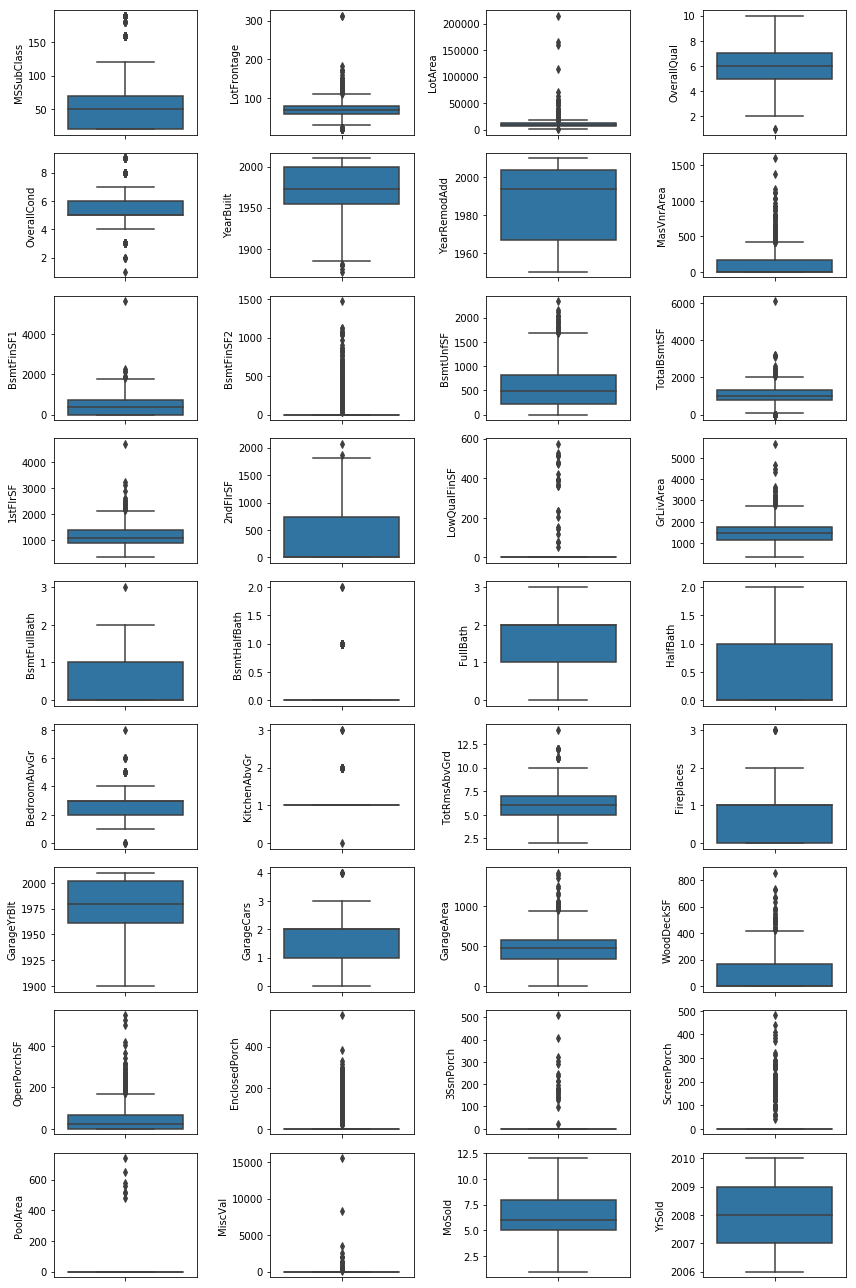

In [17]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    se.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

<font size="3">Bivariate Analysis - scatter plots for target versus numerical attributes</font>

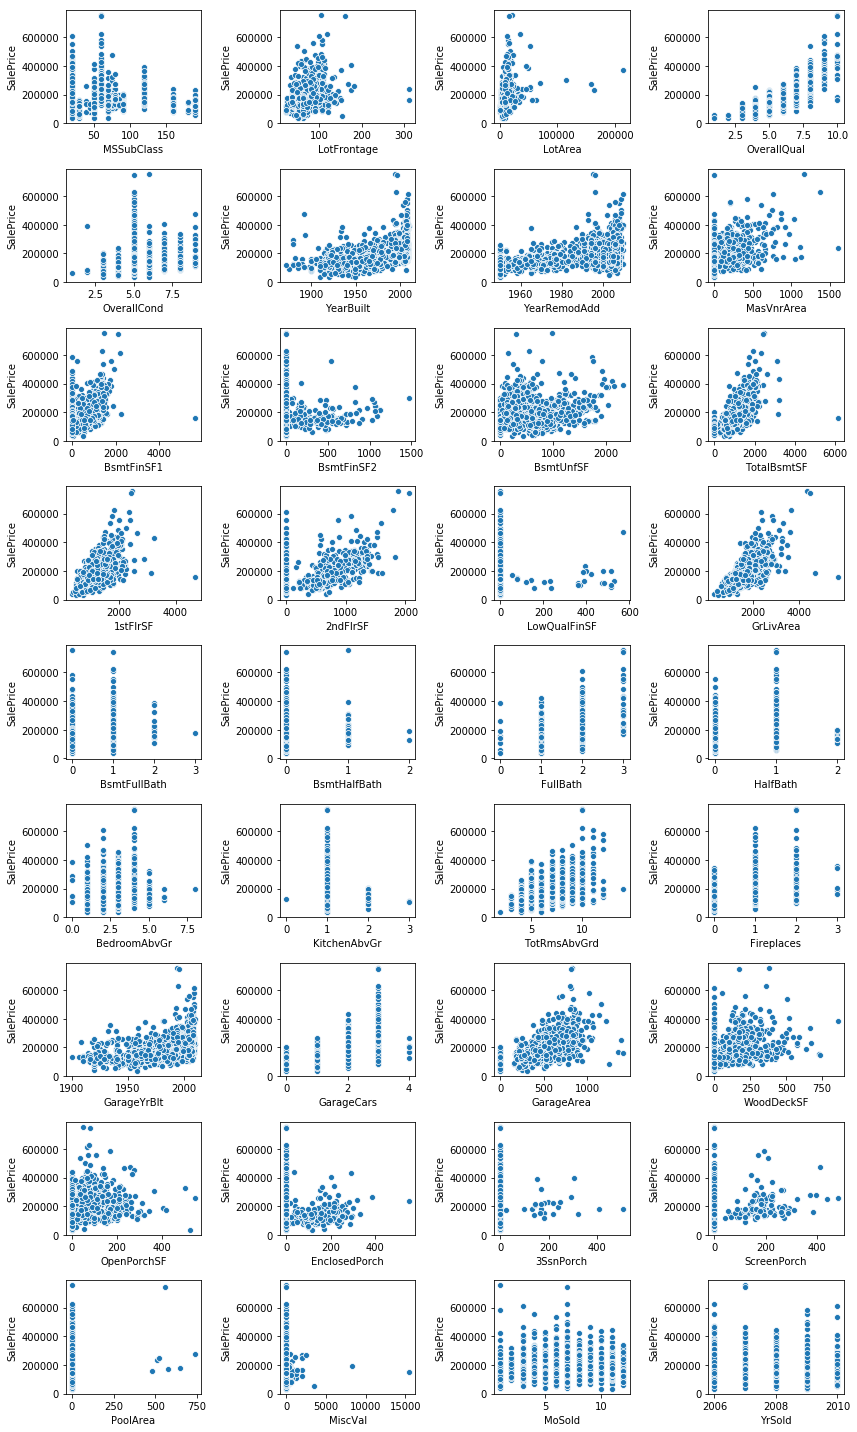

In [18]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    se.scatterplot(num_attributes.iloc[:,i], target)
    
plt.tight_layout()
plt.show()

Notes for Data Cleaning & Preprocessing
Based on a first viewing of the scatter plots against SalePrice, there appears to be:

A few outliers on the LotFrontage (say, >200) and LotArea (>100000) data.
BsmtFinSF1 (>4000) and TotalBsmtSF (>6000)
1stFlrSF (>4000)
GrLivArea (>4000 AND SalePrice <300000)
LowQualFinSF (>550).

<font size="3">Checking the correlation using HeatMap</font>

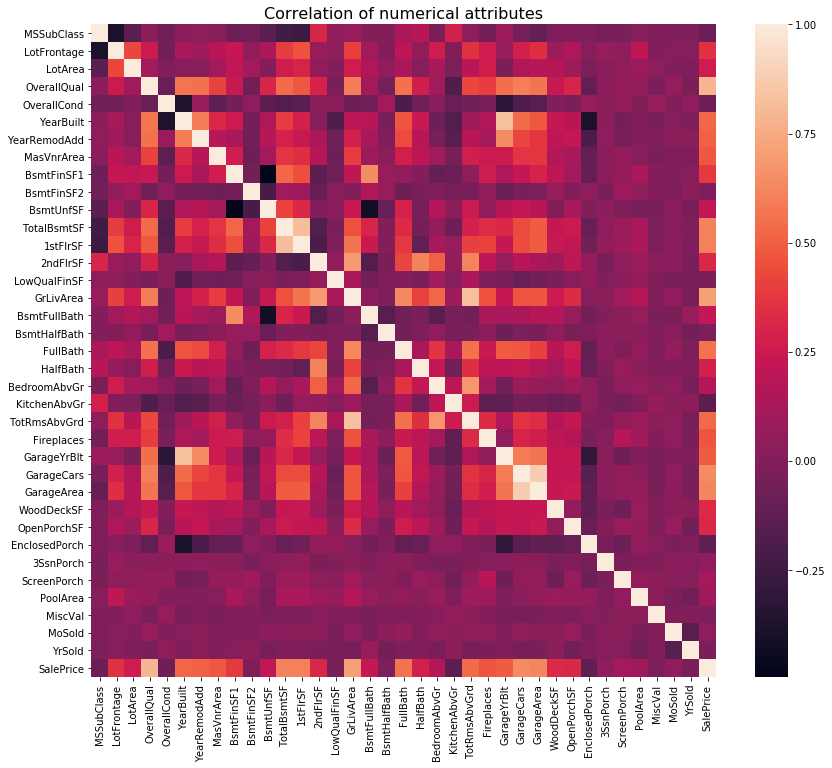

In [19]:
correlation = house_data.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
se.heatmap(correlation)
plt.show()

<font size="3">Top correlated variables with SalePrice:</font>

In [20]:
correlation['SalePrice'].sort_values(ascending=False).head(7).round(2)

SalePrice      1.00
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
Name: SalePrice, dtype: float64

<font size="3">Missing/null values in numerical columns</font>

In [21]:
num_attributes.isna().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
YrSold           0
BsmtFinSF2       0
dtype: int64

Notes for Data Cleaning & Processing:

Not yet clear what to do with LotFrontage missing values. Simple imputation with median? LotFrontage correlation with Neigborhood?
GarageYrBlt is highly correlated with YearBuilt, and as an after-note, it is discarded before the machine learning step. Hence no action required.
MasVnrArea has 8 missing values, the same number as missing MasVnrType values. Likely not to have masonry veneer. Hence, fill with 0

  <font size="4">Exploring Categorical variables</font>

In [22]:
cat_columns = house_data.select_dtypes(include='object').columns
print(cat_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


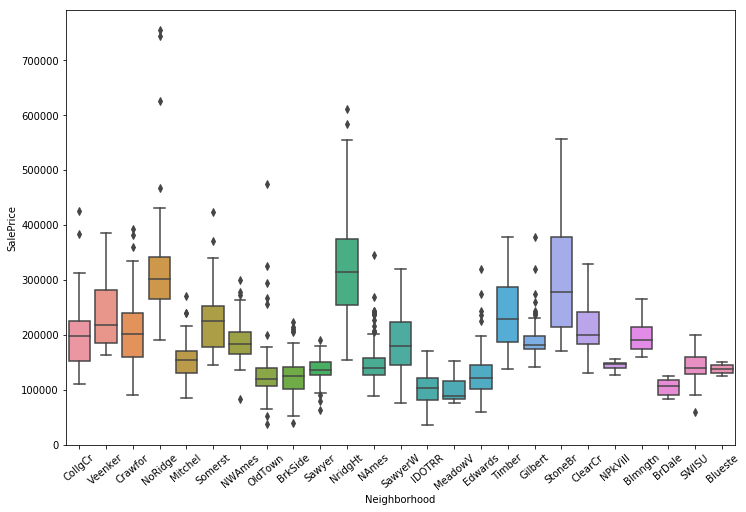

In [23]:
f, ax = plt.subplots(figsize=(12,8))
se.boxplot(y=house_data.SalePrice, x=house_data.Neighborhood)
plt.xticks(rotation=40)
plt.show()

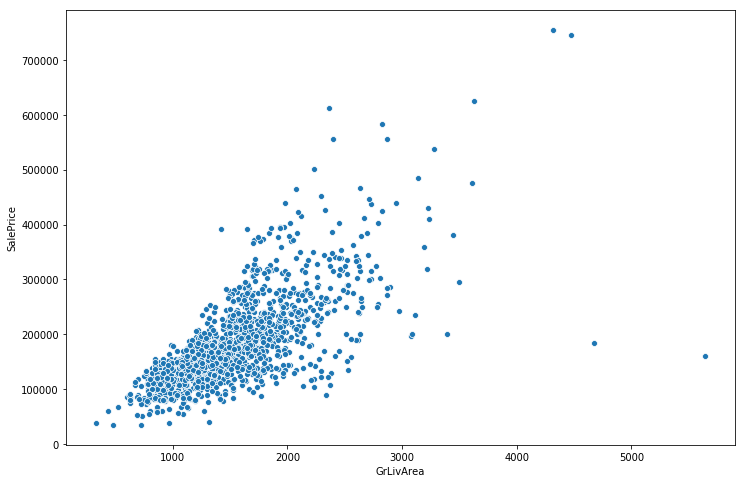

In [24]:
f, ax = plt.subplots(figsize=(12,8))
se.scatterplot(y=house_data.SalePrice, x=house_data.GrLivArea)
plt.show()

<font size="3">Missing/null values in categorical columns</font>

In [25]:
house_data[cat_columns].isna().sum().sort_values(ascending=False).head(17)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
dtype: int64

Notes for Data Cleaning & Preprocessing:

For the moment, assume that PoolQC to Bsmt attributes are missing as the houses do not have them (pools, basements, etc.). Hence, the missing values could be filled in with "None".
MasVnrType has 8 missing values, the same number as missing MasVnrArea values. Likely not to have masonry veneer. Hence, fill with 'None'

# 2. Data Cleaning & Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

<font size="3">Dealing with null/missing values </font>

In [27]:
# Create copy of dataset  ====================================
house_data_copy = house_data.copy()

# Dealing with missing/null values ===========================
# Numerical columns:
house_data_copy.MasVnrArea = house_data_copy.MasVnrArea.fillna(0)
# HOW TO TREAT LotFrontage - 259 missing values??

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for cat in cat_cols_fill_none:
    house_data_copy[cat] = house_data_copy[cat].fillna("None")

In [28]:
# Remove outliers based on observations on scatter plots against SalePrice:
house_data_copy = house_data_copy.drop(house_data_copy['LotFrontage']
                                     [house_data_copy['LotFrontage']>200].index)
house_data_copy = house_data_copy.drop(house_data_copy['LotArea']
                                     [house_data_copy['LotArea']>100000].index)
house_data_copy = house_data_copy.drop(house_data_copy['BsmtFinSF1']
                                     [house_data_copy['BsmtFinSF1']>4000].index)
house_data_copy = house_data_copy.drop(house_data_copy['TotalBsmtSF']
                                     [house_data_copy['TotalBsmtSF']>6000].index)
house_data_copy = house_data_copy.drop(house_data_copy['1stFlrSF']
                                     [house_data_copy['1stFlrSF']>4000].index)
house_data_copy = house_data_copy.drop(house_data_copy.GrLivArea
                                     [(house_data_copy['GrLivArea']>4000) & 
                                      (target<300000)].index)
house_data_copy = house_data_copy.drop(house_data_copy.LowQualFinSF
                                     [house_data_copy['LowQualFinSF']>550].index)

In [29]:
#Transforming data to reduce skew
house_data_copy['SalePrice'] = np.log(house_data_copy['SalePrice'])
house_data_copy = house_data_copy.rename(columns={'SalePrice': 'SalePrice_log'})

Few Outlier have been dropped and used 'None' for the missing values in categorical variables

# 3. Feature Selection & Engineering

Considering highly-correlated features
Feeding highly-correlated features to machine algorithms may cause a reduction in performance. Hence, these are addressed below:

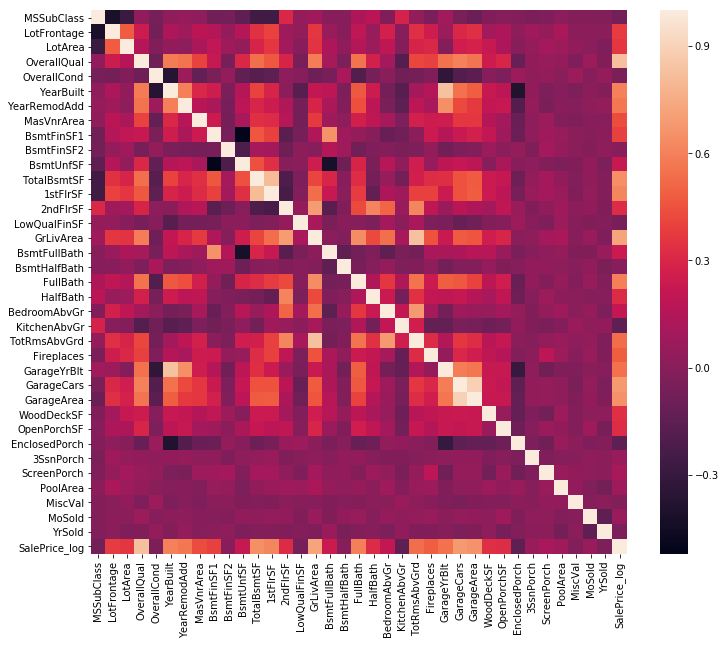

In [30]:
transformed_corr = house_data_copy.corr()
plt.figure(figsize=(12,10))
se.heatmap(transformed_corr)

Highly-correlated attributes include (left attribute has higher correlation with SalePrice_log):

GarageCars and GarageArea (0.882)
YearBuilt and GarageYrBlt (0.826)
GrLivArea_log1p and TotRmsAbvGrd (0.826)
TotalBsmtSF and 1stFlrSF_log1p (0.780)
Perhaps choose to drop the column with the lower correlation against SalePrice_log from the above pairs with more than 0.8 correlation.

Perform feature selection, and encoding of categorical columns

In [31]:
# Remove attributes that were identified for excluding when viewing scatter plots & corr values
attributes_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'] # high corr with other attributes

X = house_data_copy.drop(attributes_drop, axis=1)

# Create target object and call it y
y = house_data_copy.SalePrice_log

# One-hot-encoding to transform all categorical data
X = pd.get_dummies(X)

# Split into validation and training data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

# Normalisation - to be added later
# normaliser = StandardScaler()
# train_X = normaliser.fit_transform(train_X)
# val_X = normaliser.transform(val_X)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

Removed attributes that were identified for excluding when viewing scatter plots & corr values

Train test split of data and final impution of the missing data.

# 4. Preliminary Assessment of Machine Learning Algorithms

In [32]:
# Importing machine learning module
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

Note: target is now log(SalePrice). After prediction call, need to inverse-transform to obtain SalePrice!

In [33]:
def inv_y(transformed_y):
    return np.exp(transformed_y)

# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'
# Random Forest. Define the model. =============================
rf_model = RandomForestRegressor(random_state=5)
rf_model.fit(train_X, train_y)
rf_val_predictions = rf_model.predict(test_X)
rf_val_mae = mean_absolute_error(inv_y(rf_val_predictions), inv_y(test_y))

mae_compare['RandomForest'] = rf_val_mae
# print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))


# XGBoost. Define the model. ======================================
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(train_X, train_y, early_stopping_rounds=5, 
              eval_set=[(test_X,test_y)], verbose=False)
xgb_val_predictions = xgb_model.predict(test_X)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_predictions), inv_y(test_y))

mae_compare['XGBoost'] = xgb_val_mae
# print("Validation MAE for XGBoost Model: {:,.0f}".format(xgb_val_mae))

# Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
linear_val_predictions = linear_model.predict(test_X)
linear_val_mae = mean_absolute_error(inv_y(linear_val_predictions), inv_y(test_y))

mae_compare['LinearRegression'] = linear_val_mae
# print("Validation MAE for Linear Regression Model: {:,.0f}".format(linear_val_mae))

# Lasso ==============================================================
lasso_model = Lasso(alpha=0.001, random_state=5)
lasso_model.fit(train_X, train_y)
lasso_val_predictions = lasso_model.predict(test_X)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_predictions), inv_y(test_y))

mae_compare['Lasso'] = lasso_val_mae
# print("Validation MAE for Lasso Model: {:,.0f}".format(lasso_val_mae))

# Ridge ===============================================================
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(train_X, train_y)
ridge_val_predictions = ridge_model.predict(test_X)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_predictions), inv_y(test_y))

mae_compare['Ridge'] = ridge_val_mae
# print("Validation MAE for Ridge Regression Model: {:,.0f}".format(ridge_val_mae))

# ElasticNet ===========================================================
elastic_net_model = ElasticNet(alpha=0.02, random_state=5, l1_ratio=0.7)
elastic_net_model.fit(train_X, train_y)
elastic_net_val_predictions = elastic_net_model.predict(test_X)
elastic_net_val_mae = mean_absolute_error(inv_y(elastic_net_val_predictions), inv_y(test_y))

mae_compare['ElasticNet'] = elastic_net_val_mae
# print("Validation MAE for Elastic Net Model: {:,.0f}".format(elastic_net_val_mae))
gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=5)
gbr_model.fit(train_X, train_y)
gbr_val_predictions = gbr_model.predict(test_X)
gbr_val_mae = mean_absolute_error(inv_y(gbr_val_predictions), inv_y(test_y))

mae_compare['GradientBoosting'] = gbr_val_mae
print('MAE values for different algorithms:')
mae_compare.sort_values(ascending=True).round()

C:\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:17:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE values for different algorithms:


Algorithm
Lasso               13838.0
Ridge               14272.0
LinearRegression    14419.0
XGBoost             14673.0
GradientBoosting    14716.0
ElasticNet          16743.0
RandomForest        17134.0
dtype: float64

In [35]:
linear_model.describe()

AttributeError: 'LinearRegression' object has no attribute 'describe'

Cross-validation
Use scikit-learn's cross_val_score to try K-fold cross-validation.

In [36]:
from sklearn.model_selection import cross_val_score

n_folds = 10

# =========================================================================
scores = cross_val_score(lasso_model, train_X, train_y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
lasso_mae_scores = np.sqrt(-scores)

print('For LASSO model:')
print('Mean RMSE = ' + str(lasso_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(lasso_mae_scores.std().round(decimals=3)))

For LASSO model:
Mean RMSE = 0.109
Error std deviation = 0.015


In [37]:
scores = cross_val_score(gbr_model, train_X, train_y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
gbr_mae_scores = np.sqrt(-scores)

print('For Gradient Boosting model:')
print('Mean RMSE = ' + str(gbr_mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(gbr_mae_scores.std().round(decimals=3)))

For Gradient Boosting model:
Mean RMSE = 0.119
Error std deviation = 0.011


In [38]:
scores = cross_val_score(rf_model, train_X, train_y, scoring='neg_mean_squared_error', 
                         cv=n_folds)
mae_scores = np.sqrt(-scores)

print('For Random Forest model:')
print('Mean RMSE = ' + str(mae_scores.mean().round(decimals=3)))
print('Error std deviation = ' +str(mae_scores.std().round(decimals=3)))

For Random Forest model:
Mean RMSE = 0.141
Error std deviation = 0.018


# 5. Selection of Best Algorithm(s) & Fine-Tuning

Use scikit-learn's function to grid search for the best combination of hyperparameters

In [39]:
from sklearn.model_selection import GridSearchCV

# Tuning Lasso
param_grid = [{'alpha':  [0.0007, 0.0005,0.001, 0.005]}]
top_reg = Lasso()


# -------------------------------------------------------
grid_search = GridSearchCV(top_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(train_X, train_y)

grid_search.best_params_

{'alpha': 0.0005}

Repeat pre-processing defined previously

Create Final Model

In [40]:
# Create model - on full set of data (training & validation)
# Best model = Lasso?
final_model = Lasso(alpha=0.0005, random_state=5)
# final_model = XGBRegressor(n_estimators=1500, learning_rate=0.03)

# Fit the model using all the data - train it on all of X and y
final_model.fit(train_X, train_y)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=5,
   selection='cyclic', tol=0.0001, warm_start=False)

Make Final Prediction and checking the Mean absolute error

In [41]:
# make predictions which we will submit. 
test_preds = final_model.predict(test_X)
lasso_val_mae = mean_absolute_error(inv_y(test_preds), inv_y(test_y))

In [42]:
print("Mean absolute error using Lasso:{0}".format(lasso_val_mae.round(decimals=2)))

Mean absolute error using Lasso:13686.62
